In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/pokemons.csv')

In [ ]:
df.dtypes

id               int64
name            object
rank            object
generation      object
evolves_from    object
type1           object
type2           object
hp               int64
atk              int64
def              int64
spatk            int64
spdef            int64
speed            int64
total            int64
height           int64
weight           int64
abilities       object
desc            object
dtype: object

I will now be experimenting with Functional Programming

In [ ]:
def calculate_bmi(weight, height):
    return (weight/10) / (height / 10)**2

new_df = df.assign(BMI = calculate_bmi(df['weight'], df['height']))

In [ ]:
new_df

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc,BMI
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...,14.081633
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe...",13.000000
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...,25.000000
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s...",23.611111
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t...",15.702479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,sinistcha,ordinary,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,Not Available,55.000000
1013,1014,okidogi,legendary,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,Not Available,28.456790
1014,1015,munkidori,legendary,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,Not Available,12.200000
1015,1016,fezandipiti,legendary,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,Not Available,15.357143


In [ ]:
def add_bmi(df):
    return df.assign(BMI = calculate_bmi(df['weight'], df['height']))

def filter_by_type(df, type_name):
    return df[df['type1'] == type_name]

result_df = df.pipe(add_bmi).pipe(filter_by_type, 'Water')
top_10_bmi = new_df.nlargest(10, 'BMI')
top_10_bmi[['name', 'BMI']]

,name,BMI
789,cosmoem,99990.000000
773,minior,444.444444
303,aron,375.000000
631,durant,366.666667
365,clamperl,328.125000
323,torkoal,321.600000
330,cacnea,320.625000
989,iron-treads,296.296296
445,munchlax,291.666667
932,naclstack,291.666667


In [ ]:
df['rank'] = df['rank'].map(lambda x: x.upper())

In [ ]:
df['total'] = df.apply(lambda row: row['hp':'speed'].sum(), axis=1)

In [ ]:
def calculate_mean(df, column_name):
    return df[column_name].mean()

mean_speed = calculate_mean(df, 'speed')

In [ ]:
result_df = (df
             .pipe(add_bmi)
             .pipe(filter_by_type, 'Water')
             .drop(columns=['evolves_from', 'abilities', 'desc']))

In [ ]:
def roman_to_arabic(roman):
    roman_numerals = {'i': 1, 'v': 5, 'x': 10, 'l': 50, 'c': 100, 'd': 500, 'm': 1000}
    num = 0
    prev_value = 0
    for char in reversed(roman.lower()):
        value = roman_numerals[char]
        num = num + value if value >= prev_value else num - value
        prev_value = value
    return num

<ipython-input-12-72daddeaea40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


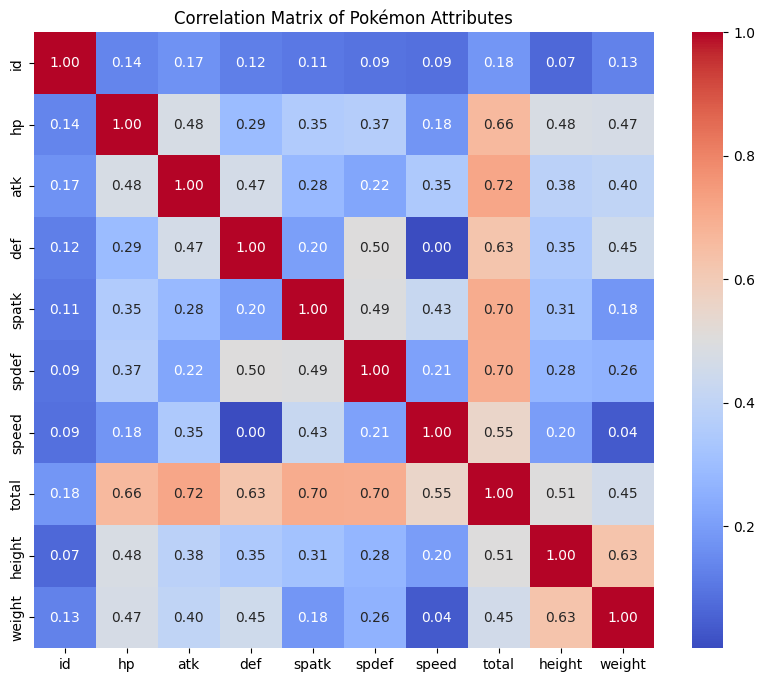

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Attributes')
plt.show()

In [ ]:
df

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ORDINARY,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ORDINARY,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ORDINARY,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ORDINARY,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ORDINARY,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,sinistcha,ORDINARY,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,Not Available
1013,1014,okidogi,LEGENDARY,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,Not Available
1014,1015,munkidori,LEGENDARY,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,Not Available
1015,1016,fezandipiti,LEGENDARY,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,Not Available


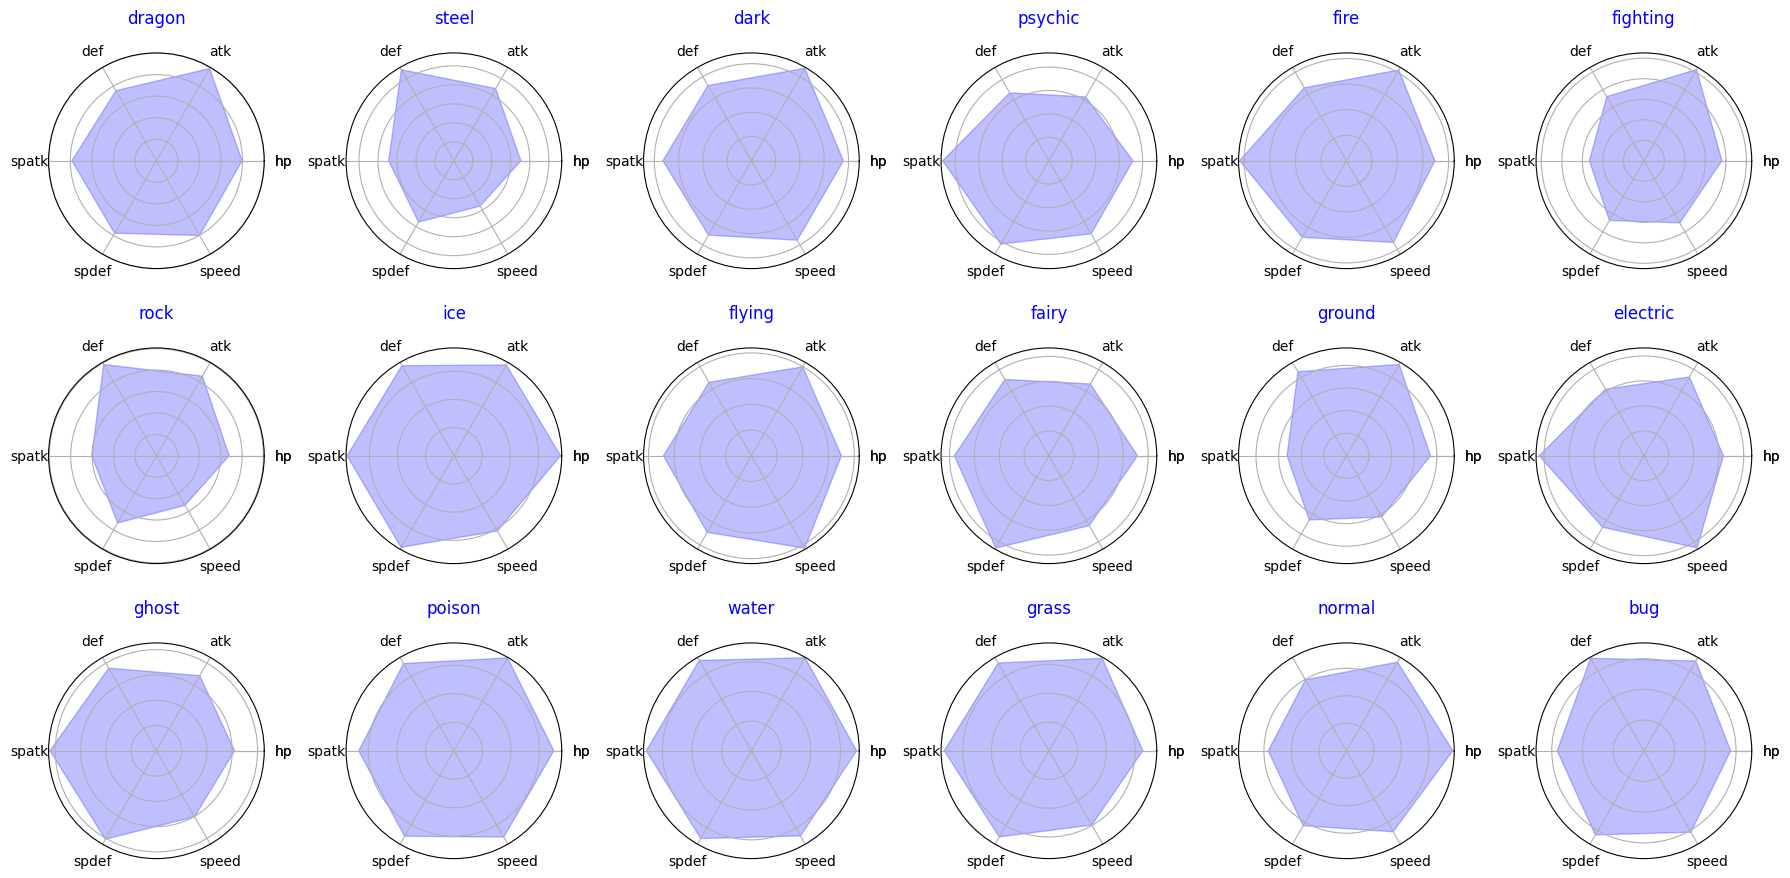

In [ ]:
def plot_radar_chart(data, title, color, ax):
    labels = data.index
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = data.values.flatten().tolist()
    values += values[:1]
    angles += angles[:1]
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(list(labels) + [labels[0]], fontsize=10)
    ax.set_title(title, size=12, color=color, y=1.1)

grouped_data = df.groupby('type1').agg({
    'hp': 'mean',
    'atk': 'mean',
    'def': 'mean',
    'spatk': 'mean',
    'spdef': 'mean',
    'speed': 'mean'
})

grouped_data_sorted = grouped_data.assign(total=grouped_data.sum(axis=1)).sort_values(by='total', ascending=False).drop(columns='total')

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 9),
                         subplot_kw=dict(polar=True))
for ax, (type_name, row) in zip(axes.flatten(), grouped_data_sorted.iterrows()):
    plot_radar_chart(row[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed']], type_name, 'blue', ax)

plt.tight_layout()
plt.show()


In [ ]:
type_advantages = {
    "Normal": {"effective": [], "weak": ["Fighting"]},
    "Fire": {"effective": ["Bug", "Grass", "Ice", "Steel"], "weak": ["Ground", "Rock", "Water"]},
    "Water": {"effective": ["Fire", "Ground", "Rock"], "weak": ["Electric", "Grass"]},
    "Grass": {"effective": ["Ground", "Rock", "Water"], "weak": ["Bug", "Fire", "Flying", "Ice", "Poison"]},
    "Flying": {"effective": ["Bug", "Fighting", "Grass"], "weak": ["Electric", "Ice", "Rock"]},
    "Fighting": {"effective": ["Dark", "Ice", "Normal", "Rock", "Steel"], "weak": ["Fairy", "Flying", "Psychic"]},
    "Poison": {"effective": ["Fairy", "Grass"], "weak": ["Ground", "Psychic"]},
    "Electric": {"effective": ["Flying", "Water"], "weak": ["Ground"]},
    "Ground": {"effective": ["Electric", "Fire", "Poison", "Rock", "Steel"], "weak": ["Grass", "Ice", "Water"]},
    "Rock": {"effective": ["Fire", "Flying", "Ice", "Bug"], "weak": ["Fighting", "Grass", "Ground", "Steel", "Water"]},
    "Ice": {"effective": ["Dragon", "Flying", "Grass", "Ground"], "weak": ["Fighting", "Fire", "Rock", "Steel"]},
    "Bug": {"effective": ["Dark", "Grass", "Psychic"], "weak": ["Fire", "Flying", "Rock"]},
    "Dragon": {"effective": ["Dragon"], "weak": ["Dragon", "Fairy", "Ice"]},
    "Ghost": {"effective": ["Ghost", "Psychic"], "weak": ["Dark", "Ghost"]},
    "Dark": {"effective": ["Ghost", "Psychic"], "weak": ["Bug", "Fairy", "Fighting"]},
    "Steel": {"effective": ["Fairy", "Ice", "Rock"], "weak": ["Fighting", "Fire", "Ground"]},
    "Fairy": {"effective": ["Dark", "Dragon", "Fighting"], "weak": ["Poison", "Steel"]},
    "Psychic": {"effective": ["Fighting", "Poison"], "weak": ["Bug", "Dark", "Ghost"]}
}

battles_optimized = []

from itertools import combinations

for (index1, pokemon1), (index2, pokemon2) in combinations(df.iterrows(), 2):
    advantage = 0
    for t1 in [pokemon1['type1'], pokemon1['type2']]:
        for t2 in [pokemon2['type1'], pokemon2['type2']]:
            if t1 in type_advantages and t2 in type_advantages[t1]['effective']:
                advantage += 1
            if t1 in type_advantages and t2 in type_advantages[t1]['weak']:
                advantage -= 1

    if advantage > 0:
        winner = 0
    elif advantage < 0:
        winner = 1
    else:
        winner = 0 if pokemon1['total'] > pokemon2['total'] else 1

    battles_optimized.append({
        'pokemon1_id': pokemon1['id'],
        'pokemon2_id': pokemon2['id'],
        'pokemon1_type1': pokemon1['type1'],
        'pokemon1_type2': pokemon1['type2'],
        'pokemon2_type1': pokemon2['type1'],
        'pokemon2_type2': pokemon2['type2'],
        'pokemon1_total': pokemon1['total'],
        'pokemon2_total': pokemon2['total'],
        'winner': winner
    })

battle_data_optimized = pd.DataFrame(battles_optimized)

battle_data_optimized

,pokemon1_id,pokemon2_id,pokemon1_type1,pokemon1_type2,pokemon2_type1,pokemon2_type2,pokemon1_total,pokemon2_total,winner
0,1,2,grass,poison,grass,poison,318,405,1
1,1,3,grass,poison,grass,poison,318,525,1
2,1,4,grass,poison,fire,None,318,309,0
3,1,5,grass,poison,fire,None,318,405,1
4,1,6,grass,poison,fire,flying,318,534,1
...,...,...,...,...,...,...,...,...,...
516631,1014,1016,poison,fighting,poison,fairy,555,555,1
516632,1014,1017,poison,fighting,grass,None,555,550,0
516633,1015,1016,poison,psychic,poison,fairy,555,555,1
516634,1015,1017,poison,psychic,grass,None,555,550,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = battle_data_optimized.drop(columns=['winner'])
y = battle_data_optimized['winner']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['pokemon1_total', 'pokemon2_total']),
        ('cat', OneHotEncoder(drop='first'), ['pokemon1_type1', 'pokemon1_type2', 'pokemon2_type1', 'pokemon2_type2'])
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

X_train_transformed.shape, X_val_transformed.shape


((413308, 72), (103328, 72))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_transformed, y_train)

y_val_pred = model.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

accuracy, classification_rep


(0.9982482966862806,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     44308\n           1       1.00      1.00      1.00     59020\n\n    accuracy                           1.00    103328\n   macro avg       1.00      1.00      1.00    103328\nweighted avg       1.00      1.00      1.00    103328\n')

In [ ]:
def simulate_battle(pokemon1_name, pokemon2_name, model, preprocessor, data):
    """
    Simulate a battle between two Pokémon and predict the outcome using the trained model.

    Parameters:
    - pokemon1_name: Name of the first Pokémon.
    - pokemon2_name: Name of the second Pokémon.
    - model: Trained machine learning model.
    - preprocessor: Preprocessor for feature transformation.
    - data: Pokémon dataset with attributes.

    Returns:
    - Predicted winner's name.
    """

    pokemon1 = data[data['name'] == pokemon1_name].iloc[0]
    pokemon2 = data[data['name'] == pokemon2_name].iloc[0]

    battle_df = pd.DataFrame({
        'pokemon1_id': [pokemon1['id']],
        'pokemon2_id': [pokemon2['id']],
        'pokemon1_type1': [pokemon1['type1']],
        'pokemon1_type2': [pokemon1['type2']],
        'pokemon2_type1': [pokemon2['type1']],
        'pokemon2_type2': [pokemon2['type2']],
        'pokemon1_total': [pokemon1['total']],
        'pokemon2_total': [pokemon2['total']]
    })

    battle_transformed = preprocessor.transform(battle_df)

    prediction = model.predict(battle_transformed)

    return pokemon1_name if prediction[0] == 0 else pokemon2_name

sample_battle_winner = simulate_battle("zacian", "zamazenta", model, preprocessor, df)
sample_battle_winner

'zamazenta'

In [ ]:
simulate_battle("zacian", "zamazenta", nn_model, preprocessor, df)

NameError: ignored

In [ ]:
coefficients = model.coef_[0]

feature_names_numeric = preprocessor.transformers_[0][-1]
feature_names_categorical = preprocessor.named_transformers_['cat'].get_feature_names_out()
feature_names = list(feature_names_numeric) + list(feature_names_categorical)
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importances_df = feature_importances_df.reindex(feature_importances_df.Coefficient.abs().sort_values(ascending=False).index)

feature_importances_df.head(10)

,Feature,Coefficient
1,pokemon2_total,49.867211
0,pokemon1_total,-47.497089
3,pokemon1_type1_dragon,0.777177
38,pokemon2_type1_dragon,0.565872
52,pokemon2_type1_steel,0.514959
17,pokemon1_type1_steel,0.448051
23,pokemon1_type2_fairy,0.424086
37,pokemon2_type1_dark,0.414639
31,pokemon1_type2_normal,-0.376954
65,pokemon2_type2_ice,-0.363155


In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

nn_model.fit(X_train_transformed, y_train)

y_val_pred_nn = nn_model.predict(X_val_transformed)
accuracy_nn = accuracy_score(y_val, y_val_pred_nn)
classification_rep_nn = classification_report(y_val, y_val_pred_nn)

accuracy_nn, classification_rep_nn

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(0.9981902291731186,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     44308\n           1       1.00      1.00      1.00     59020\n\n    accuracy                           1.00    103328\n   macro avg       1.00      1.00      1.00    103328\nweighted avg       1.00      1.00      1.00    103328\n')

In [ ]:

type_stats = {t: {"wins": 0, "battles": 0} for t in type_advantages.keys()}

for _, row in battle_data_optimized.iterrows():
    winner_type = row['pokemon1_type1'].capitalize() if row['winner'] == 0 else row['pokemon2_type1'].capitalize()
    loser_type = row['pokemon2_type1'].capitalize() if row['winner'] == 0 else row['pokemon1_type1'].capitalize()

    type_stats[winner_type]['wins'] += 1
    type_stats[winner_type]['battles'] += 1
    type_stats[loser_type]['battles'] += 1
win_probabilities = {t: stats['wins'] / stats['battles'] for t, stats in type_stats.items()}

win_probabilities


{'Normal': 0.419955918971667,
 'Fire': 0.552740763173834,
 'Water': 0.4818574450581737,
 'Grass': 0.46489501312335957,
 'Flying': 0.5421041119860017,
 'Fighting': 0.531373031496063,
 'Poison': 0.48494814672556175,
 'Electric': 0.519871707846864,
 'Ground': 0.5264763779527559,
 'Rock': 0.5342761431136898,
 'Ice': 0.5379095758191517,
 'Bug': 0.3745375201593777,
 'Dragon': 0.644392423919983,
 'Ghost': 0.5063273340832396,
 'Dark': 0.5815398075240595,
 'Steel': 0.6082098193608152,
 'Fairy': 0.518870486016834,
 'Psychic': 0.5424212598425197}

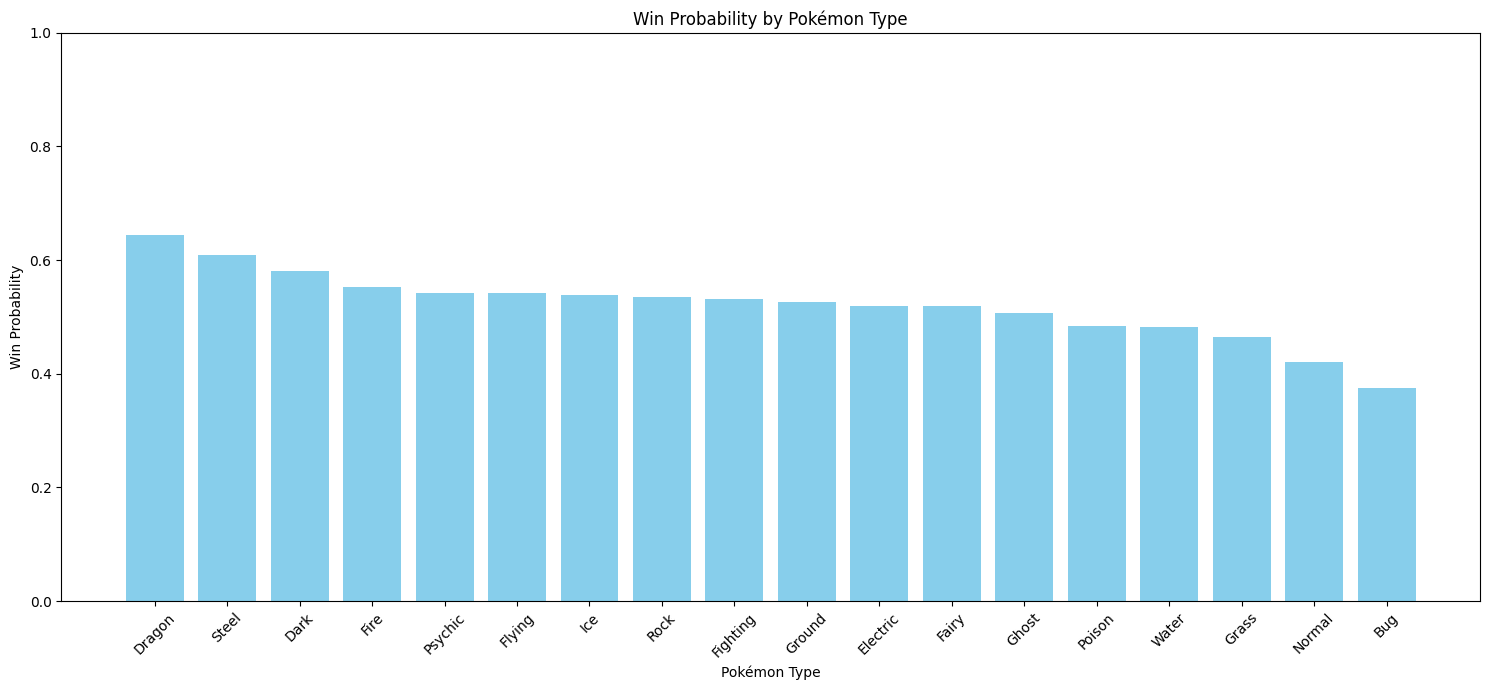

In [ ]:
import matplotlib.pyplot as plt
sorted_win_probs = dict(sorted(win_probabilities.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(15, 7))
plt.bar(sorted_win_probs.keys(), sorted_win_probs.values(), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Pokémon Type')
plt.ylabel('Win Probability')
plt.title('Win Probability by Pokémon Type')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
type_combination_stats = battle_data_optimized.groupby(['pokemon1_type1', 'pokemon1_type2']).agg(
    total_battles=pd.NamedAgg(column='winner', aggfunc='size'),
    wins=pd.NamedAgg(column='winner', aggfunc=lambda x: (x == 0).sum())
).reset_index()
type_combination_stats['win_rate'] = type_combination_stats['wins'] / type_combination_stats['total_battles']
type_combination_stats = type_combination_stats.sort_values(by='win_rate', ascending=False)
type_combination_stats.head()

,pokemon1_type1,pokemon1_type2,total_battles,wins,win_rate
143,poison,fairy,1,1,1.000000
159,psychic,steel,226,224,0.991150
31,dragon,electric,373,368,0.986595
90,ghost,dragon,530,522,0.984906
33,dragon,fire,374,368,0.983957


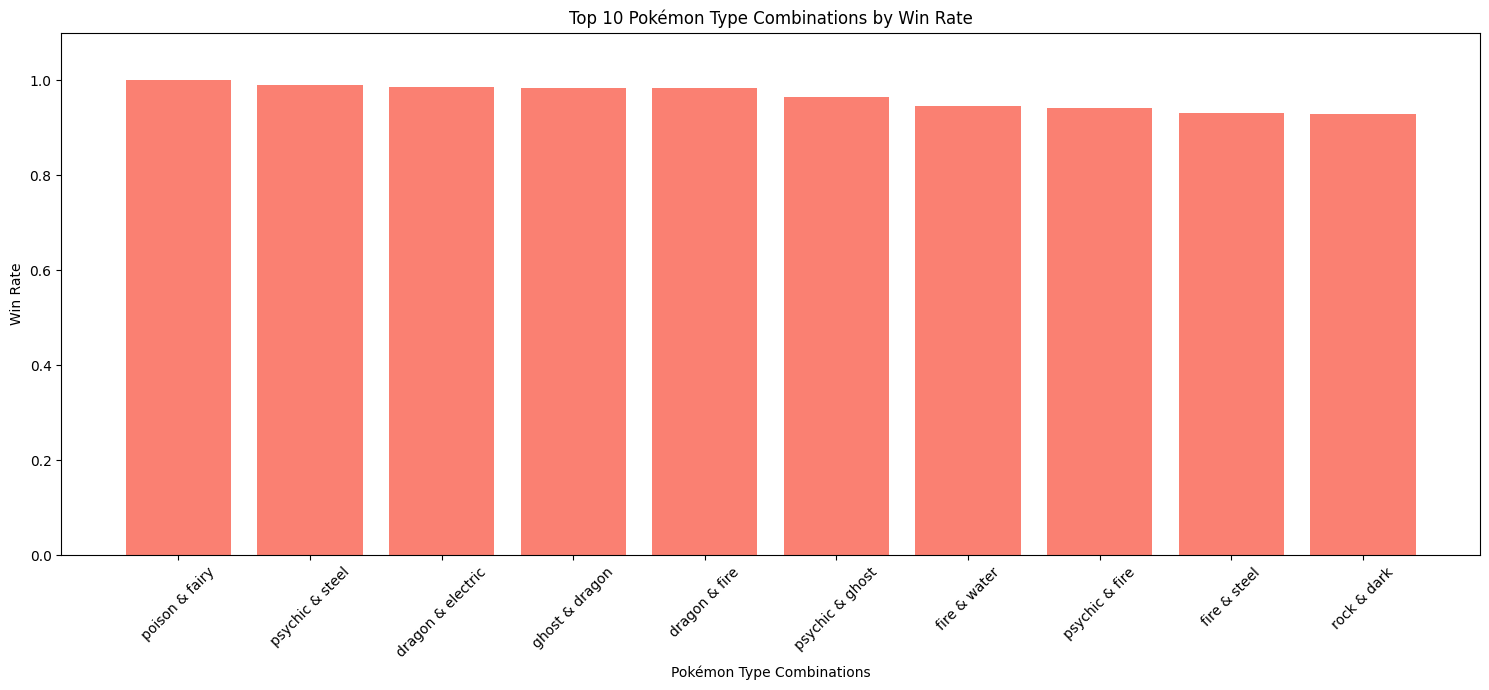

In [ ]:
top_10_combinations = type_combination_stats.head(10)
combination_names = [f"{row['pokemon1_type1']} & {row['pokemon1_type2']}" for _, row in top_10_combinations.iterrows()]

plt.figure(figsize=(15, 7))
plt.bar(combination_names, top_10_combinations['win_rate'], color='salmon')
plt.xticks(rotation=45)
plt.xlabel('Pokémon Type Combinations')
plt.ylabel('Win Rate')
plt.title('Top 10 Pokémon Type Combinations by Win Rate')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [ ]:
avg_stats_by_gen = df.groupby('generation').mean()

num_pokemon_by_gen = df.groupby('generation').size()



<ipython-input-28-d81e630b489d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_stats_by_gen = df.groupby('generation').mean()


In [ ]:
generation_analysis = avg_stats_by_gen[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total']]
generation_analysis['num_pokemon'] = num_pokemon_by_gen

generation_analysis

<ipython-input-29-6b42a732a7cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generation_analysis['num_pokemon'] = num_pokemon_by_gen


,hp,atk,def,spatk,spdef,speed,total,num_pokemon
generation,,,,,,,,
generation-i,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225,407.642384,151
generation-ii,70.980000,68.260000,69.690000,64.500000,72.340000,61.410000,407.180000,100
generation-iii,65.666667,73.111111,69.007407,67.859259,66.466667,61.614815,403.725926,135
generation-iv,73.102804,80.214953,75.112150,73.280374,74.383178,69.476636,445.570093,107
generation-ix,75.919643,81.901786,74.437500,71.017857,71.258929,74.901786,449.437500,112
generation-v,70.314103,81.032051,71.237179,69.243590,67.333333,66.596154,425.756410,156
generation-vi,68.916667,72.500000,75.083333,72.541667,74.583333,65.680556,429.305556,72
generation-vii,71.011364,84.772727,78.727273,74.954545,74.568182,65.375000,449.409091,88
generation-viii,72.822917,82.906250,73.281250,71.645833,69.614583,68.947917,439.218750,96


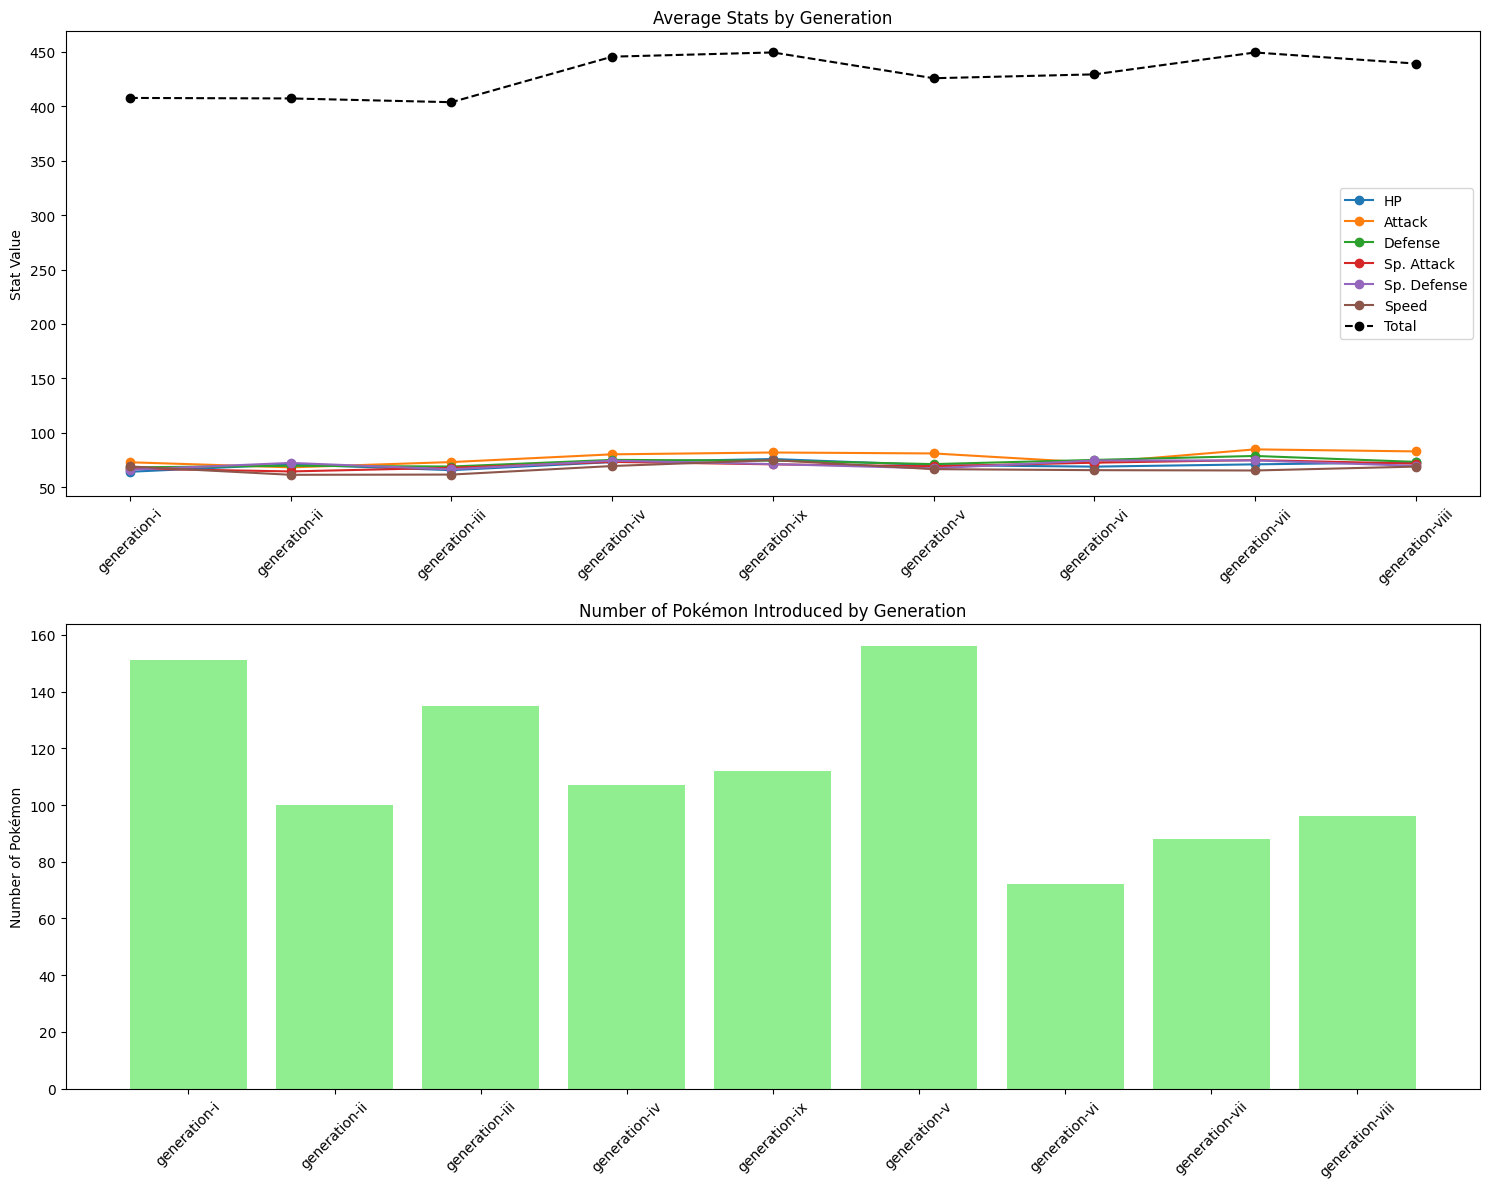

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
ax[0].plot(generation_analysis.index, generation_analysis['hp'], label='HP', marker='o')
ax[0].plot(generation_analysis.index, generation_analysis['atk'], label='Attack', marker='o')
ax[0].plot(generation_analysis.index, generation_analysis['def'], label='Defense', marker='o')
ax[0].plot(generation_analysis.index, generation_analysis['spatk'], label='Sp. Attack', marker='o')
ax[0].plot(generation_analysis.index, generation_analysis['spdef'], label='Sp. Defense', marker='o')
ax[0].plot(generation_analysis.index, generation_analysis['speed'], label='Speed', marker='o')
ax[0].plot(generation_analysis.index, generation_analysis['total'], label='Total', marker='o', linestyle='--', color='black')
ax[0].legend()
ax[0].set_title('Average Stats by Generation')
ax[0].set_ylabel('Stat Value')
ax[0].tick_params(axis='x', rotation=45)
ax[1].bar(generation_analysis.index, generation_analysis['num_pokemon'], color='lightgreen')
ax[1].set_title('Number of Pokémon Introduced by Generation')
ax[1].set_ylabel('Number of Pokémon')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
stat_columns = ['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total']
evolution_pairs = []

for i in range(len(df) - 1):
    current_pokemon = df.iloc[i]
    next_pokemon = df.iloc[i + 1]

    # Check if the next Pokémon has higher stats in most categories
    higher_stats = sum(next_pokemon[stat] > current_pokemon[stat] for stat in stat_columns)

    if higher_stats >= 4:  # If at least 4 out of 6 stats are higher, consider it as an evolution
        evolution_pairs.append((current_pokemon['name'], next_pokemon['name']))

# Now, let's calculate the average stat differences between evolution pairs
avg_stat_differences = {stat: 0 for stat in stat_columns}
for pre_evolution, post_evolution in evolution_pairs:
    pre_data = df[df['name'] == pre_evolution].iloc[0]
    post_data = df[df['name'] == post_evolution].iloc[0]

    for stat in stat_columns:
        avg_stat_differences[stat] += (post_data[stat] - pre_data[stat])

# Calculate average differences
for stat in avg_stat_differences:
    avg_stat_differences[stat] /= len(evolution_pairs)

avg_stat_differences

{'hp': 20.72568093385214,
 'atk': 24.223735408560312,
 'def': 20.883268482490273,
 'spatk': 21.408560311284045,
 'spdef': 21.1284046692607,
 'speed': 17.560311284046694,
 'total': 125.92996108949416}

In [ ]:
avg_stat_differences = {stat: 0 for stat in stat_columns}
for pre_evolution, post_evolution in evolution_pairs:
    pre_data = df[df['name'] == pre_evolution].iloc[0]
    post_data = df[df['name'] == post_evolution].iloc[0]

    for stat in stat_columns:
        avg_stat_differences[stat] += (post_data[stat] - pre_data[stat])

# Calculate average differences
for stat in avg_stat_differences:
    avg_stat_differences[stat] /= len(evolution_pairs)

avg_stat_differences

{'hp': 20.72568093385214,
 'atk': 24.223735408560312,
 'def': 20.883268482490273,
 'spatk': 21.408560311284045,
 'spdef': 21.1284046692607,
 'speed': 17.560311284046694,
 'total': 125.92996108949416}

In [ ]:
sample_pairs = evolution_pairs[:100]

avg_stat_differences_sample = {stat: 0 for stat in stat_columns}
for pre_evolution, post_evolution in sample_pairs:
    pre_data = df[df['name'] == pre_evolution].iloc[0]
    post_data = df[df['name'] == post_evolution].iloc[0]

    for stat in stat_columns:
        avg_stat_differences_sample[stat] += (post_data[stat] - pre_data[stat])

# Calculate average differences for the sample
for stat in avg_stat_differences_sample:
    avg_stat_differences_sample[stat] /= len(sample_pairs)

avg_stat_differences_sample

{'hp': 19.58,
 'atk': 22.49,
 'def': 18.36,
 'spatk': 21.62,
 'spdef': 22.48,
 'speed': 18.52,
 'total': 123.05}

In [ ]:
# Adjusting the stat_columns list to match the actual column names
stat_columns_corrected = ['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total']

# Re-calculate the average stat differences for the revised evolution pairs using the corrected stat_columns
avg_stat_differences_revised = {stat: 0 for stat in stat_columns_corrected}
for pre_evolution, post_evolution in evolution_pairs_revised:
    pre_data = df[df['name'] == pre_evolution].iloc[0]
    post_data = df[df['name'] == post_evolution].iloc[0]

    for stat in stat_columns_corrected:
        avg_stat_differences_revised[stat] += (post_data[stat] - pre_data[stat])

# Calculate average differences
for stat in avg_stat_differences_revised:
    avg_stat_differences_revised[stat] /= len(evolution_pairs_revised)

# Calculate average stat differences for a sample of 100 evolution pairs from the revised list
sample_pairs_revised = evolution_pairs_revised[:100]

avg_stat_differences_sample_revised = {stat: 0 for stat in stat_columns_corrected}
for pre_evolution, post_evolution in sample_pairs_revised:
    pre_data = df[df['name'] == pre_evolution].iloc[0]
    post_data = df[df['name'] == post_evolution].iloc[0]

    for stat in stat_columns_corrected:
        avg_stat_differences_sample_revised[stat] += (post_data[stat] - pre_data[stat])

# Calculate average differences for the sample
for stat in avg_stat_differences_sample_revised:
    avg_stat_differences_sample_revised[stat] /= len(sample_pairs_revised)

avg_stat_differences_revised, avg_stat_differences_sample_revised


({'hp': 22.7,
  'atk': 29.622222222222224,
  'def': 24.833333333333332,
  'spatk': 25.533333333333335,
  'spdef': 23.08888888888889,
  'speed': 21.344444444444445,
  'total': 147.12222222222223},
 {'hp': 22.7,
  'atk': 29.622222222222224,
  'def': 24.833333333333332,
  'spatk': 25.533333333333335,
  'spdef': 23.08888888888889,
  'speed': 21.344444444444445,
  'total': 147.12222222222223})

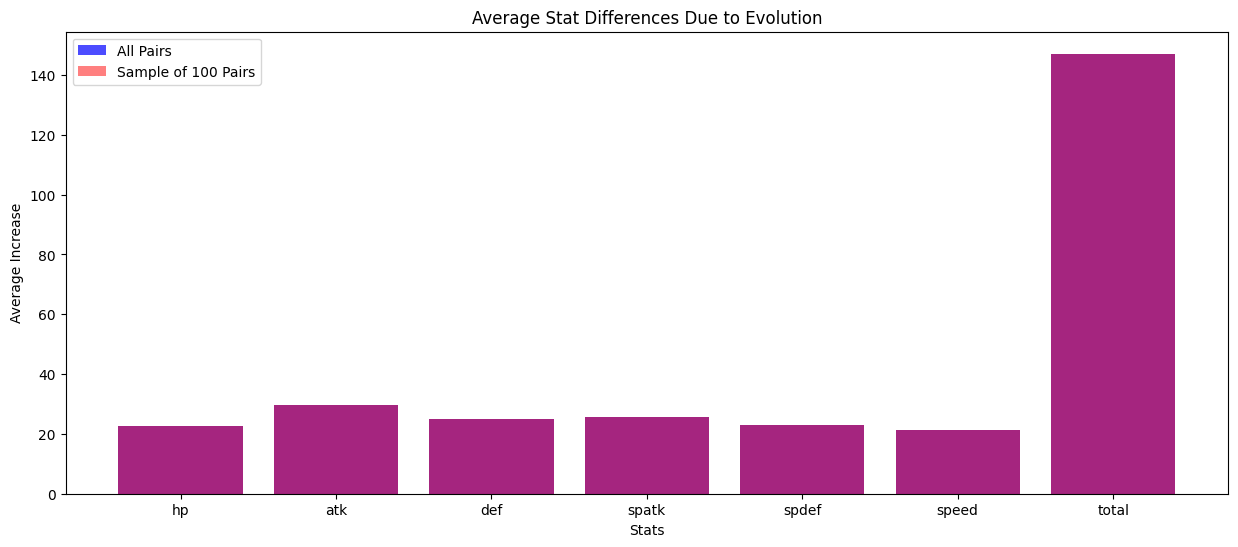

In [ ]:
import matplotlib.pyplot as plt

# Plotting the average stat differences for all evolution pairs
plt.figure(figsize=(15, 6))
plt.bar(avg_stat_differences_revised.keys(), avg_stat_differences_revised.values(), color='blue', alpha=0.7, label='All Pairs')
plt.bar(avg_stat_differences_sample_revised.keys(), avg_stat_differences_sample_revised.values(), color='red', alpha=0.5, label='Sample of 100 Pairs')
plt.title('Average Stat Differences Due to Evolution')
plt.ylabel('Average Increase')
plt.xlabel('Stats')
plt.legend()
plt.show()


In [ ]:
# Refining evolution detection to focus on 2nd to 3rd stage evolutions

# Heuristic: Set a threshold for 'total' stats to identify 2nd stage Pokémon
# Assuming that a 2nd stage Pokémon will have a total stat between 300 and 450 and a 3rd stage Pokémon will have a stat greater than 450
second_stage_threshold_min = 300
second_stage_threshold_max = 450

# Identify potential 2nd to 3rd stage evolution pairs
second_to_third_evolution_pairs = []

for i in range(len(df) - 1):
    current_pokemon = df.iloc[i]
    next_pokemon = df.iloc[i + 1]

    # Check for an increase in the 'total' stat
    stat_increase = next_pokemon['total'] > current_pokemon['total']

    # Check if the current Pokémon is potentially a 2nd stage and the next Pokémon is potentially a 3rd stage
    is_second_stage = second_stage_threshold_min <= current_pokemon['total'] <= second_stage_threshold_max
    is_third_stage = next_pokemon['total'] > second_stage_threshold_max

    # Check for name similarity
    name_similarity = similar(current_pokemon['name'], next_pokemon['name']) > 0.6

    if stat_increase and name_similarity and is_second_stage and is_third_stage:
        second_to_third_evolution_pairs.append((current_pokemon['name'], next_pokemon['name']))

# Calculate the average stat differences for the 2nd to 3rd stage evolution pairs
avg_stat_differences_2nd_to_3rd = {stat: 0 for stat in stat_columns_corrected}
for pre_evolution, post_evolution in second_to_third_evolution_pairs:
    pre_data = df[df['name'] == pre_evolution].iloc[0]
    post_data = df[df['name'] == post_evolution].iloc[0]

    for stat in stat_columns_corrected:
        avg_stat_differences_2nd_to_3rd[stat] += (post_data[stat] - pre_data[stat])

# Calculate average differences
for stat in avg_stat_differences_2nd_to_3rd:
    avg_stat_differences_2nd_to_3rd[stat] /= len(second_to_third_evolution_pairs)

avg_stat_differences_2nd_to_3rd


{'hp': 24.958333333333332,
 'atk': 34.666666666666664,
 'def': 25.979166666666668,
 'spatk': 27.625,
 'spdef': 21.4375,
 'speed': 20.875,
 'total': 155.54166666666666}

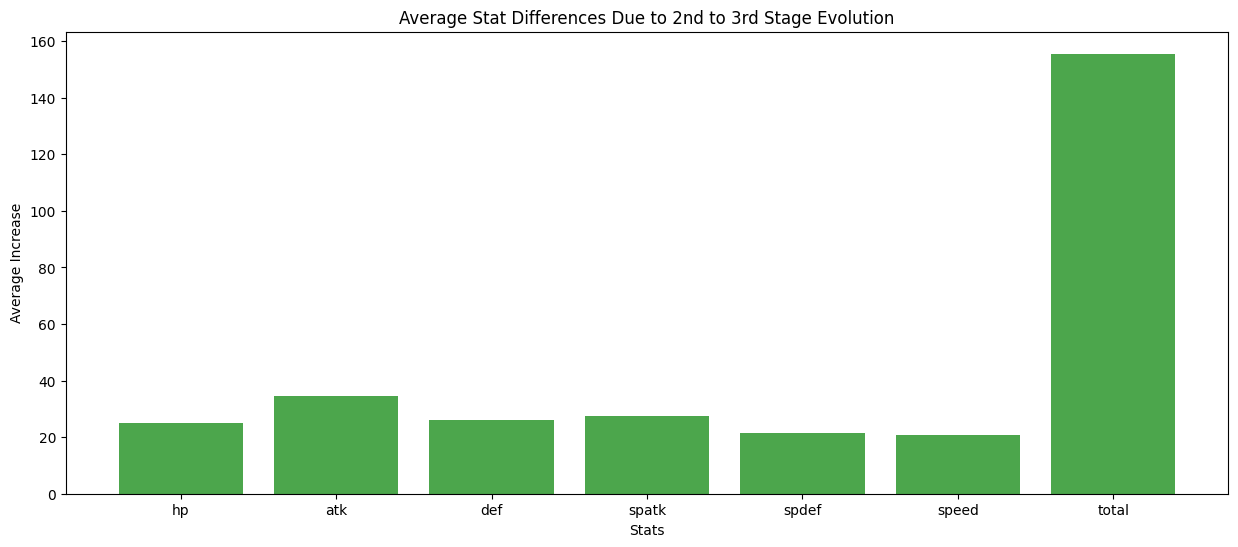

In [ ]:
# Plotting the average stat differences for 2nd to 3rd stage evolutions
plt.figure(figsize=(15, 6))
plt.bar(avg_stat_differences_2nd_to_3rd.keys(), avg_stat_differences_2nd_to_3rd.values(), color='green', alpha=0.7)
plt.title('Average Stat Differences Due to 2nd to 3rd Stage Evolution')
plt.ylabel('Average Increase')
plt.xlabel('Stats')
plt.show()


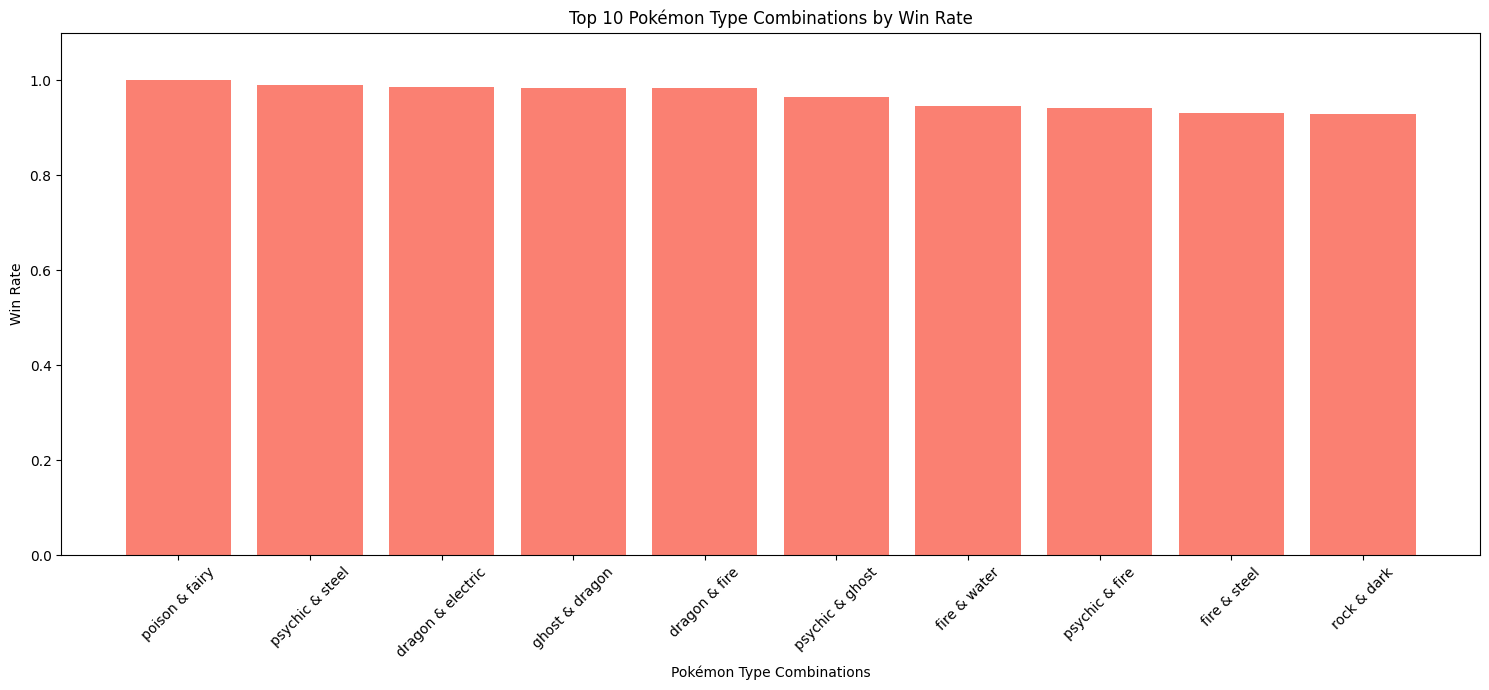